<a href="https://colab.research.google.com/github/MarianaMH1195/MarianaMH1195/blob/main/EDA_Veterinary_Clinical_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0) Setup y versiones
Importamos librerías y mostramos versiones para reproducibilidad.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys
import importlib



## 1) Carga de datos


In [35]:
path = '/content/veterinary_clinical_data.csv'
df = pd.read_csv(path)

print("Shape:", df.shape)
display(df.head(10))
display(df.dtypes.to_frame("dtype"))

Shape: (10000, 10)


,AnimalName,Breed,Age,Weight_kg,MedicalHistory,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,Dog,Rottweiler,6.0,32.1,Chronic illness,Anorexia,Hydrophobia,drooping ears,Diarrhea,Shyness or aggression
1,Dog,Bulldog,9.9,18.5,Vaccinated,Lethargy,Weakness,Horny growth,Fever,Coughing
2,Dog,Beagle,13.9,18.9,Parasite history,Pain,Weight loss,Weight loss,Sneezing,Drop on egg production
3,cat,Scottish Fold,5.8,6.3,Recent surgery,Vomiting,Pain,Edema in lower jaw,Pain,Weakness
4,cat,Persian,11.2,4.9,Recent surgery,Severe,Weight loss,Egg production stops,Weakness,Poor Body condition
5,Dog,Mixed Breed,4.2,13.4,Chronic illness,Weakness,Diarrhea,Weight loss,Diarrhea,Weight loss
6,Dog,Boxer,2.6,27.6,Dental issues,Indigestion,Abdminal pain,Constipation,Diarrhea,Nausea
7,Dog,Yorkshire Terrier,12.4,3.8,Previous heart condition,Weakness,Weight loss,Muscle twiching,Shivering,Vomiting
8,cat,Maine Coon,5.9,5.7,Previous kidney disease,outstretched neck,dull ness,inappetence,noisy breathing,coughing
9,Dog,Beagle,1.7,16.2,Allergies,Fever,Loss of appetite,Reduce Energy,Lameness,Swelling of joints


,dtype
AnimalName,object
Breed,object
Age,float64
Weight_kg,float64
MedicalHistory,object
Symptom_1,object
Symptom_2,object
Symptom_3,object
Symptom_4,object
Symptom_5,object


## 2) Calidad de datos y limpieza
Revisamos **valores faltantes**, **duplicados** y consistencia básica (rangos y formato de texto).

In [36]:
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame("missing_values"))

dup_rows = df.duplicated().sum()
print("Duplicados exactos:", dup_rows)

display(df[["Age", "Weight_kg"]].describe())

,missing_values
AnimalName,0
Breed,0
Age,0
Weight_kg,0
MedicalHistory,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Symptom_5,0


Duplicados exactos: 20


,Age,Weight_kg
count,10000.000000,10000.000000
mean,8.428050,14.891990
std,4.639286,12.624691
min,0.500000,2.500000
25%,4.800000,5.300000
50%,8.400000,7.300000
75%,12.000000,25.500000
max,18.000000,45.000000


In [37]:
veterinary_data_df = df.copy()

In [38]:
for col in veterinary_data_df.columns:
  if veterinary_data_df[col].dtype == 'object':
    veterinary_data_df[col] = veterinary_data_df[col].astype('string')

display(veterinary_data_df.dtypes)

,0
AnimalName,string[python]
Breed,string[python]
Age,float64
Weight_kg,float64
MedicalHistory,string[python]
Symptom_1,string[python]
Symptom_2,string[python]
Symptom_3,string[python]
Symptom_4,string[python]
Symptom_5,string[python]


### Limpieza aplicada


In [39]:
df_clean = df.drop_duplicates().copy()


text_cols = df_clean.select_dtypes(include="object").columns
for c in text_cols:
    df_clean[c] = df_clean[c].astype(str).str.strip()

df_clean["Species"] = df_clean["AnimalName"].str.lower().map({"dog": "Dog", "cat": "Cat"})

removed = len(df) - len(df_clean)
print(f"Filas iniciales: {len(df)}")
print(f"Filas tras limpieza: {len(df_clean)}")
print(f"Filas eliminadas (duplicados exactos): {removed}")


missing_after = df_clean.isna().sum().sum()
print(f"Valores faltantes tras limpieza: {int(missing_after)}")
print("Imputación aplicada: NO (no hay nulos en el dataset)")

Filas iniciales: 10000
Filas tras limpieza: 9980
Filas eliminadas (duplicados exactos): 20
Valores faltantes tras limpieza: 0
Imputación aplicada: NO (no hay nulos en el dataset)


## 3) EDA obligatorio

### a) Edad y peso por especie
Estadísticos descriptivos (media, mediana, desviación estándar) para edad y peso en perros y gatos.

In [40]:
def descriptivos_por_especie(df_in, especie):
    sub = df_in[df_in["Species"] == especie]
    return pd.Series({
        "n": len(sub),
        "Age_mean": sub["Age"].mean(),
        "Age_median": sub["Age"].median(),
        "Age_std": sub["Age"].std(),
        "Weight_mean": sub["Weight_kg"].mean(),
        "Weight_median": sub["Weight_kg"].median(),
        "Weight_std": sub["Weight_kg"].std(),
    })

stats = pd.DataFrame({
    "Dog": descriptivos_por_especie(df_clean, "Dog"),
    "Cat": descriptivos_por_especie(df_clean, "Cat"),
}).T

display(stats)

,n,Age_mean,Age_median,Age_std,Weight_mean,Weight_median,Weight_std
Dog,5013.0,7.473988,7.5,4.082992,24.202873,25.5,11.890496
Cat,4967.0,9.410046,9.4,4.948552,5.520415,5.6,1.596712


###1) En la distribución de edad por especie, se observa que ambas especies presentan patrones relativamente similares; sin embargo, hay diferencias importantes en la concentración de edades.

- En la especie azul (perros), la mayor frecuencia se encuentra en edades más
bajas, mostrando un pico en animales jóvenes.

- En la especie naranja (gatos), la concentración aumenta en edades mayores, lo que indica que dentro del dataset hay más gatos adultos o senior en comparación con perros.

###2) Distribución de peso por especie
En esta gráfica se observa la diferencia clara en la distribución del peso entre perros y gatos:

- Los gatos se concentran mayormente entre 4 y 8 kg, con una distribución más estrecha.

- Los perros muestran un rango mucho más amplio, generalmente entre 10 y 40 kg, lo que refleja la mayor variabilidad entre razas y tamaños.

/tmp/ipython-input-4000284269.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Especie")


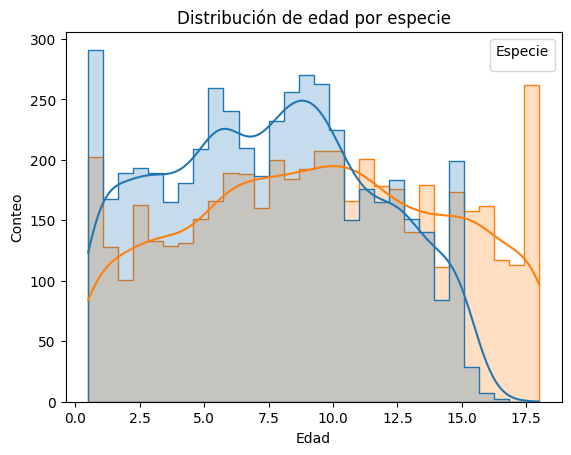

/tmp/ipython-input-4000284269.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Especie")


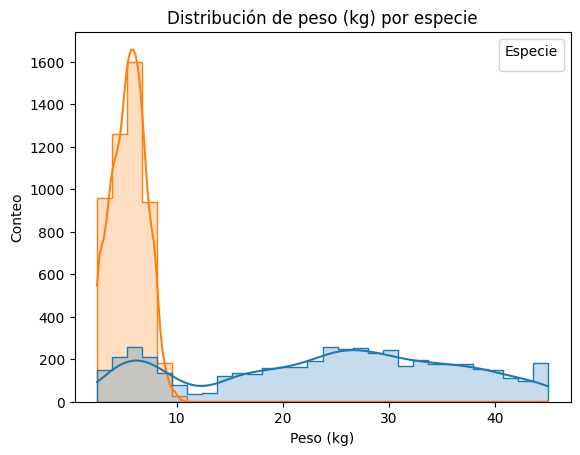

In [41]:
# Distribución de edad por especie
plt.figure()
sns.histplot(data=df_clean, x="Age", hue="Species", kde=True, bins=30, element="step")
plt.title("Distribución de edad por especie")
plt.xlabel("Edad")
plt.ylabel("Conteo")
plt.legend(title="Especie")
plt.show()

# Distribución de peso por especie
plt.figure()
sns.histplot(data=df_clean, x="Weight_kg", hue="Species", kde=True, bins=30, element="step")
plt.title("Distribución de peso (kg) por especie")
plt.xlabel("Peso (kg)")
plt.ylabel("Conteo")
plt.legend(title="Especie")
plt.show()

### Distribución de especies
Conteo por especie (barra y pastel).

,count
Species,
Dog,5013
Cat,4967


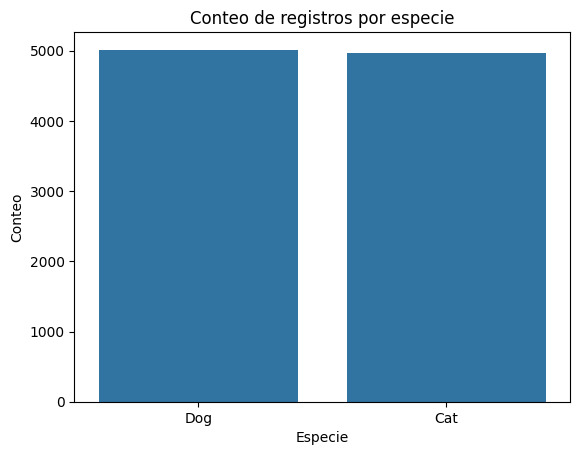

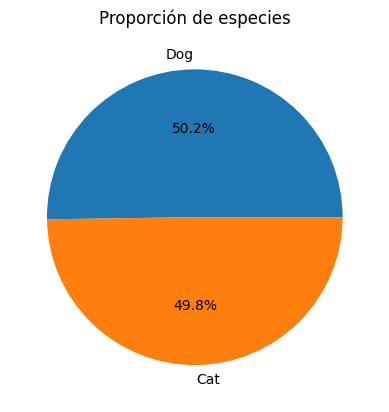

In [42]:
species_counts = df_clean["Species"].value_counts()
display(species_counts.to_frame("count"))

plt.figure()
sns.barplot(x=species_counts.index, y=species_counts.values)
plt.title("Conteo de registros por especie")
plt.xlabel("Especie")
plt.ylabel("Conteo")
plt.show()

plt.figure()
plt.pie(species_counts.values, labels=species_counts.index, autopct="%1.1f%%")
plt.title("Proporción de especies")
plt.show()

### Síntomas/diagnósticos más frecuentes
El dataset **no tiene columna de diagnóstico**. Analizamos los síntomas combinando `Symptom_1..Symptom_5`.
Mostramos el top 10 y una visualización.

,count
Fever,3519
Weight loss,3061
Diarrhea,2978
Pain,2683
Coughing,2665
Lethargy,2601
Vomiting,2598
Weakness,2539
Sneezing,2431
Anorexia,2401


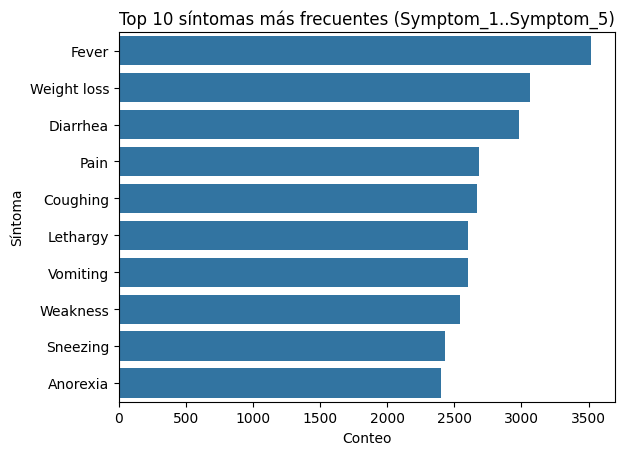

In [43]:
sym_cols = [c for c in df_clean.columns if c.lower().startswith("symptom")]
sym_long = pd.concat([df_clean[c].astype(str).str.strip() for c in sym_cols], ignore_index=True)

top_symptoms = sym_long.value_counts().head(10)
display(top_symptoms.to_frame("count"))

plt.figure()
sns.barplot(y=top_symptoms.index, x=top_symptoms.values)
plt.title("Top 10 síntomas más frecuentes (Symptom_1..Symptom_5)")
plt.xlabel("Conteo")
plt.ylabel("Síntoma")
plt.show()

###  Patrones entre edad, peso y categoría clínica
Como alternativa al diagnóstico, usamos:
- `MedicalHistory` (historial médico)
- `Symptom_1` (síntoma principal)

Analizamos promedios y boxplots por especie.

###Decidimos utilizar boxplots porque este tipo de gráfica permite comparar la distribución de edad y peso entre diferentes categorías del MedicalHistory de una forma muy visual y directa. En particular, los boxplots ayudan a:

- Identificar la variación dentro de cada historial médico
Podemos ver si ciertos antecedentes (como alergias, cirugías recientes o enfermedades crónicas) se asocian con animales más jóvenes, mayores, más pesados o más ligeros.

- Comparar rápidamente perros vs. gatos
Como aparecen ambos en la misma gráfica, es fácil detectar diferencias entre especies para cada condición médica.

- Detectar valores atípicos (outliers)
Esto es útil para saber si algún historial médico está relacionado con casos extremos, como animales demasiado jóvenes, muy viejos o con pesos poco usuales.

- Observar tendencias generales
Por ejemplo, si ciertos diagnósticos son más comunes en animales mayores o en perros de mayor peso.

,n,Age_mean,Age_median,Weight_mean,Weight_median
MedicalHistory,,,,,
Skin conditions history,1016,8.087402,7.75,15.164764,7.8
No previous conditions,991,8.657619,8.70,14.952573,7.2
Recent surgery,953,8.239664,8.00,15.830640,7.8
Chronic illness,938,8.239126,7.80,15.471109,7.6
Not vaccinated,920,8.248370,8.10,15.358261,7.5
Allergies,896,8.404799,8.30,15.243304,7.6
Parasite history,886,8.380700,8.40,15.120542,7.4
Dental issues,885,8.703842,8.70,13.637514,6.8
Previous kidney disease,869,8.445339,8.70,14.619793,7.4


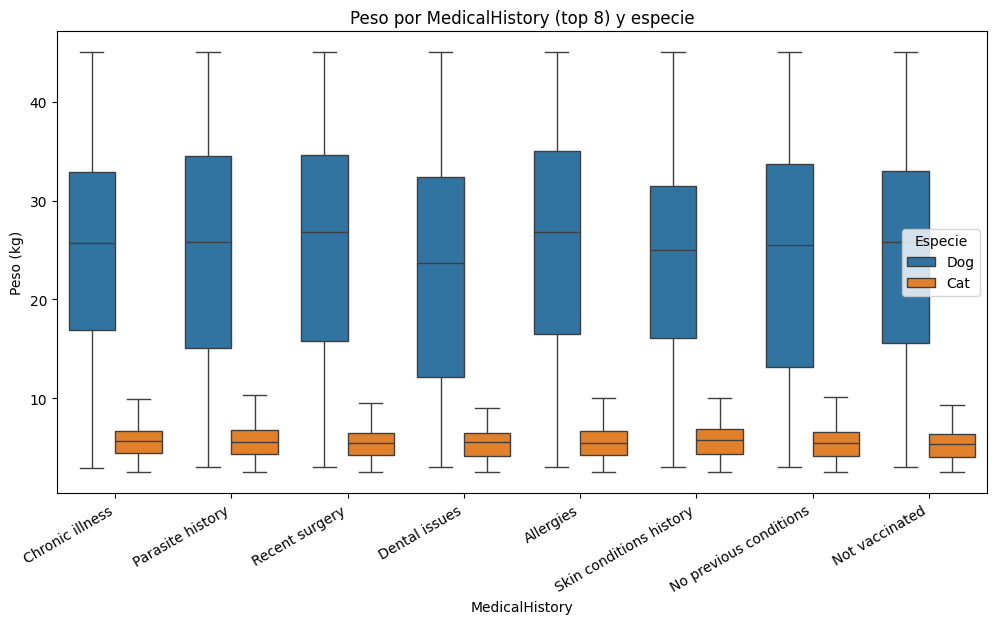

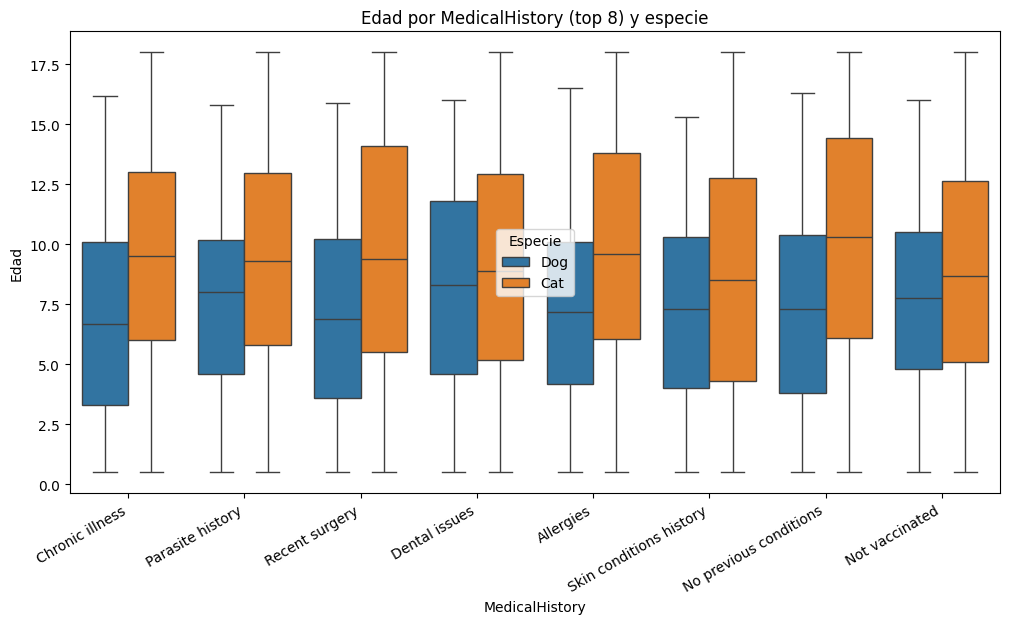

In [44]:
mh_summary = df_clean.groupby("MedicalHistory").agg(
    n=("MedicalHistory", "size"),
    Age_mean=("Age", "mean"),
    Age_median=("Age", "median"),
    Weight_mean=("Weight_kg", "mean"),
    Weight_median=("Weight_kg", "median"),
).sort_values("n", ascending=False)

display(mh_summary)

top_mh = mh_summary.head(8).index.tolist()
sub_mh = df_clean[df_clean["MedicalHistory"].isin(top_mh)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_mh, x="MedicalHistory", y="Weight_kg", hue="Species")
plt.title("Peso por MedicalHistory (top 8) y especie")
plt.xlabel("MedicalHistory")
plt.ylabel("Peso (kg)")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Especie")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_mh, x="MedicalHistory", y="Age", hue="Species")
plt.title("Edad por MedicalHistory (top 8) y especie")
plt.xlabel("MedicalHistory")
plt.ylabel("Edad")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Especie")
plt.show()

,n,Age_mean,Weight_mean
Symptom_1,,,
Fever,1385,8.320722,15.002671
Weight loss,539,8.383117,14.708163
Weakness,500,8.500200,14.250800
Diarrhea,491,8.651731,15.399593
Vomiting,491,8.369450,15.581466
Sneezing,489,8.455828,13.677505
Pain,477,8.081551,15.559748
Lethargy,475,8.421474,14.938526
Coughing,470,8.344255,15.055106


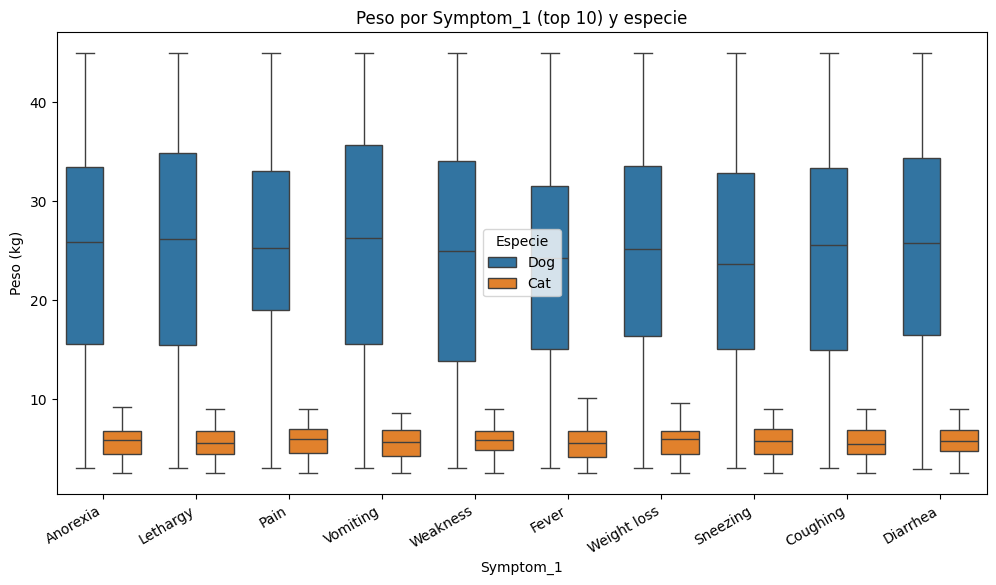

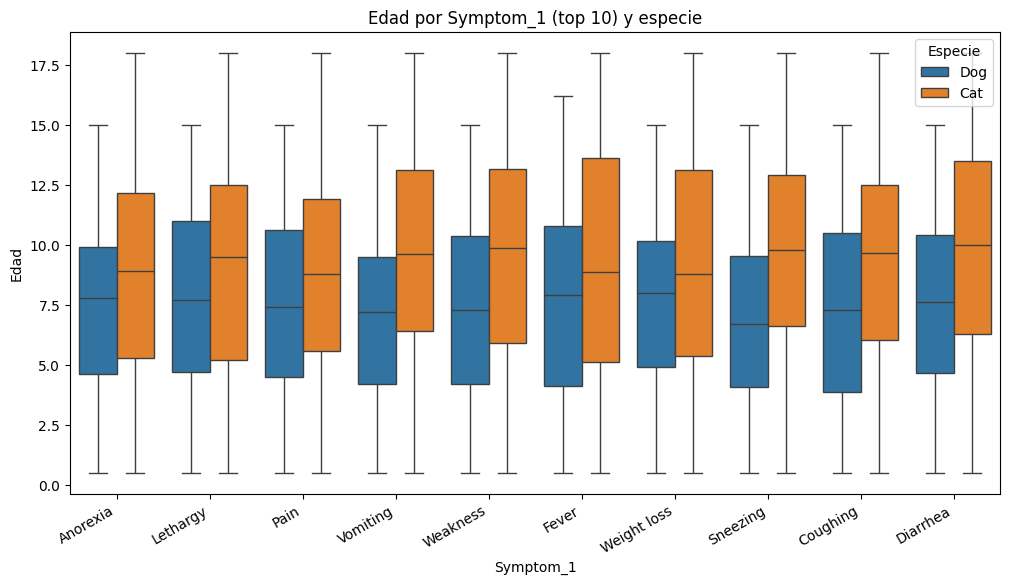

In [45]:
sym1_summary = df_clean.groupby("Symptom_1").agg(
    n=("Symptom_1", "size"),
    Age_mean=("Age", "mean"),
    Weight_mean=("Weight_kg", "mean"),
).sort_values("n", ascending=False)

display(sym1_summary.head(15))

top_sym1 = sym1_summary.head(10).index.tolist()
sub_s1 = df_clean[df_clean["Symptom_1"].isin(top_sym1)].copy()

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_s1, x="Symptom_1", y="Weight_kg", hue="Species")
plt.title("Peso por Symptom_1 (top 10) y especie")
plt.xlabel("Symptom_1")
plt.ylabel("Peso (kg)")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Especie")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=sub_s1, x="Symptom_1", y="Age", hue="Species")
plt.title("Edad por Symptom_1 (top 10) y especie")
plt.xlabel("Symptom_1")
plt.ylabel("Edad")
plt.xticks(rotation=30, ha="right")
plt.legend(title="Especie")
plt.show()

###Usamos boxplots porque permiten comparar rápidamente cómo varían la edad y el peso entre distintos síntomas. Con ellos podemos ver:

- La distribución completa (mediana, rango, variación).

- Diferencias entre perros y gatos dentro de cada síntoma.

- atrones clínicos, como síntomas más comunes en animales más jóvenes o más pesados.

- Valores atípicos, que ayudan a identificar casos inusuales.

# Se dividen en grupos:
**Graves:** son síntomas ante los que hay que buscar ayuda inmediata para que el animal no muera.

**Medios:** son síntomas que hay que tener en cuenta y llevar al veterinario en cuanto se pueda. No hay peligro de muerte.

**Leves:** son síntomas que no implican un riesgo de muerte ni gran preocupación. Solo observar su duración y si hay otros síntomas.

In [50]:
#Se filtrarán por síntomas graves, medios y leves:
sintomas_cols = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']
graves = ['fever', 'diarrhea', 'ulcerated ear', 'dyspnea', 'dehydration', 'cough']
medios = ['vomiting', 'yellow eyes']
leves = ['lethargia', 'loss of appetite']
filtro_graves = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in graves), axis=1)
df_filtrado_graves = df.loc[filtro_graves, sintomas_cols]

filtro_medios = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in medios), axis=1)
df_filtrado_medios = df.loc[filtro_medios, sintomas_cols]

filtro_leves = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in leves), axis=1)
df_filtrado_leves = df.loc[filtro_leves, sintomas_cols]

display(df_filtrado_graves)
display(df_filtrado_medios)
display(df_filtrado_leves)

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
120,Edema,diarrhea,Nasal Discharge,Decresed egg production,Sneezing
206,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression
213,nasal discharge,depression,muscular stiffness,fever,swollen lymph nodes
231,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression
311,lack of appetite,high body temperaure,diarrhea,sudden death,loss of appetite
...,...,...,...,...,...
9835,change their normal behaviour,stop drinking,Pains,diarrhea,stop eating
9874,cough,sneeze,droopy wings,twisted neck,droopy wings
9904,loss of appetite,high body temperaure,lack of appetite,diarrhea,sudden death
9979,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression


,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
180,burning ache or pain,vomiting,loss of appetite,experiencing changes in weight,pain and bloating
1193,burning ache or pain,vomiting,loss of appetite,experiencing changes in weight,pain and bloating
1381,loss of appetite,vomiting,pain and bloating,experiencing changes in weight,burning ache or pain
2152,Pain,Weakness,Coughing,vomiting,Pustulses
2723,nausea,vomiting,loss of appetite,experiencing changes in weight,pain and bloating
3290,nausea,vomiting,loss of appetite,experiencing changes in weight,pain and bloating
4243,burning ache or pain,vomiting,loss of appetite,experiencing changes in weight,pain and bloating
4589,vomiting,Lethargy,Lethargy,Weakness,Fast breathing
4648,nausea,vomiting,loss of appetite,experiencing changes in weight,pain and bloating
4870,experiencing changes in weight,pain and bloating,burning ache or pain,vomiting,loss of appetite


,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
23,Smell,Diarrhea,loss of appetite,Excess sleeping,Folded Ears
29,Fever,loss of appetite,Depression,Loss of appetite,Pains
97,emaciation,loss in weight,loss of appetite,Weakness,diarrhoea
101,loss of appetite,Diarrhea,Lession on cat skin,Coughing,Vomiting
140,Changes in outer layer skin,Swelling of eye,loss of appetite,Lethargy,Respiratory infection
...,...,...,...,...,...
9886,Egg production stops,loss of appetite,Weight loss,Constipation,Broody behavior
9904,loss of appetite,high body temperaure,lack of appetite,diarrhea,sudden death
9939,burning ache or pain,vomiting,loss of appetite,experiencing changes in weight,pain and bloating
9979,fever,loss of appetite,rapid pulse and heart rates,lameness in affected leg,depression


No charts were generated by quickchart


In [54]:
#Se filtrarán por enfermedades:
sintomas_cols = ['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5']

rabia = ['Hydrophobia','Shyness or aggression']
filtro_rabia = df[sintomas_cols].apply(lambda fila: all(s in fila.values for s in rabia), axis=1)
df_filtrado_rabia = df.loc[filtro_rabia, sintomas_cols]


prob_hepaticos = ['Yellow Eye']
filtro_prob_hepaticos = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in prob_hepaticos), axis=1)
df_filtrado_prob_hepaticos = df.loc[filtro_prob_hepaticos, sintomas_cols]


muerte = ['Death', 'Sudden death']
filtro_muerte = df[sintomas_cols].apply(lambda fila: any(s in fila.values for s in muerte), axis=1)
df_filtrado_muerte = df.loc[filtro_muerte, sintomas_cols]

display(df_filtrado_rabia)
display(df_filtrado_prob_hepaticos)
display(df_filtrado_muerte)


,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
0,Anorexia,Hydrophobia,drooping ears,Diarrhea,Shyness or aggression
713,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
1603,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
2308,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
4684,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
6380,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
7077,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
7728,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
9825,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression
9898,Fever,Seizures,Hydrophobia,Jaw is dropped,Shyness or aggression


,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
1011,Vomiting,Weight loss,Sneezing,Yellow Eye,Sneezing
1619,Lethargy,Weight loss,Yellow Eye,Coughing,Facial edema
2345,Fever,Difficultty in Breathing,Yellow Eye,Sneezing,Diphtherictic
3058,Fever,Difficultty in Breathing,Yellow Eye,Sneezing,Diphtherictic
4310,Fever,Difficultty in Breathing,Yellow Eye,Sneezing,Diphtherictic
6603,Weekness,Acting unnaturally tame,Coughing,Yellow Eye,Constant pacing
7401,Weight loss,Yellow Eye,Weakness,Vomiting,Facial muscle twitching
7568,Yellow Eye,Sneezing,Weakness,Diarrhea,Ruminal stasis
8278,Diphtherictic,Yellow Eye,Fever,Sneezing,Difficultty in Breathing
8472,Fever,Difficultty in Breathing,Yellow Eye,Sneezing,Diphtherictic


,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5
78,Weight loss,Urine retention,Fever,Sudden death,Convulsion
98,haemorrhage,Straw colored,Abdominal pain,Death,Carcass decomposes
111,Respiratory distress,Seizuers,Hyperesthesia,Fever,Sudden death
134,Reluctant Move,Loss of Appetite,Lameness,Death,Weakness
141,Fever,Difficulty in breathing,Lethargy,Death,Pains
...,...,...,...,...,...
9889,Pains,Fleece become thin,Death,Loss of wool,Sheep often bites
9892,Jaundice,Coughing,Loss of appetite,Rough Hair coat,Death
9908,Hemopytsis,Diarrhea,Asymptomatic,Death,Epistaxis
9949,Fetopelvic dispropotion,Uteria inertia,Malpresentation,Death,Pains


###Usamos gráficos de barras porque son la mejor forma de comparar el peso promedio entre distintas razas dentro de cada especie. Estos gráficos permiten:

- Ver rápidamente qué razas pesan más o menos dentro de gatos y perros.

- Comparar diferencias claras entre razas sin complicar la visualización.

- Facilitar la interpretación clínica, ya que ciertas razas tienden a ser naturalmente más grandes o pequeñas.

/tmp/ipython-input-605152541.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peso_gatos, x='Breed', y='Weight_kg', palette='pastel', ax=axes[0])
/tmp/ipython-input-605152541.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=peso_perros, x='Breed', y='Weight_kg', palette='muted', ax=axes[1])


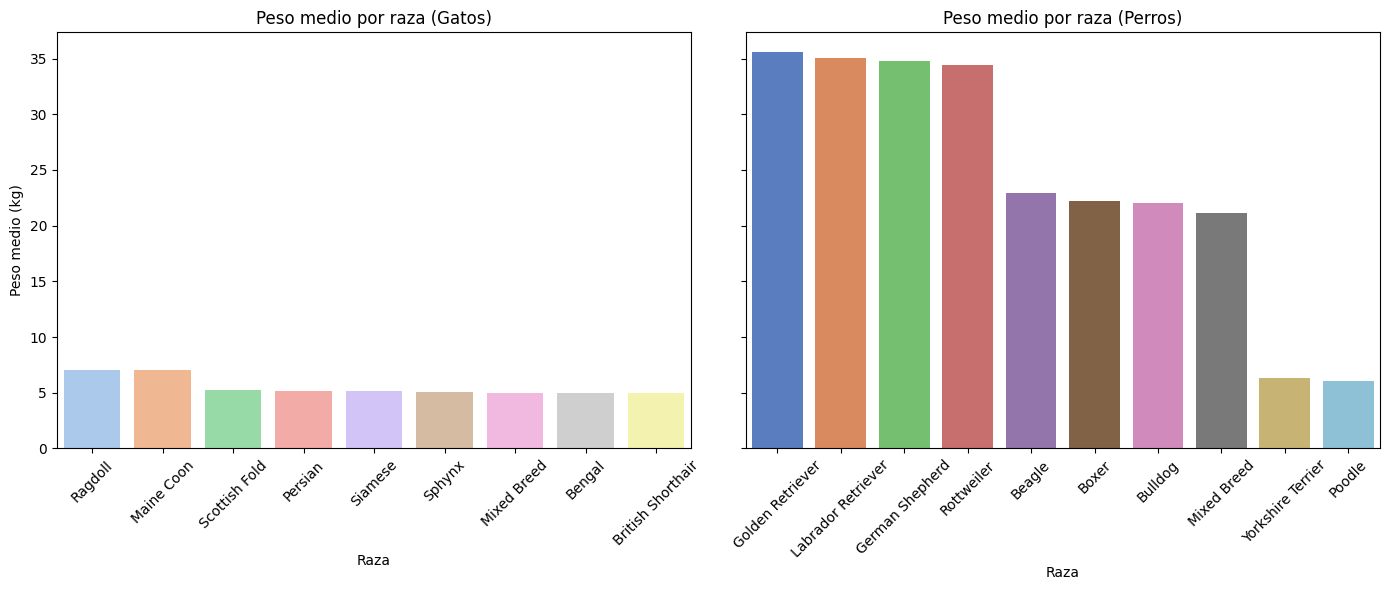

In [56]:
# Agrupar por raza y calcular el peso medio
peso_por_raza = veterinary_data_df.groupby(['AnimalName','Breed'])['Weight_kg'].mean().reset_index()

#Separar gatos y perros
peso_gatos = peso_por_raza[peso_por_raza['AnimalName'] == 'cat'].sort_values(by='Weight_kg', ascending=False)
peso_perros = peso_por_raza[peso_por_raza['AnimalName'] == 'Dog'].sort_values(by='Weight_kg', ascending=False)

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Gráfico de gatos
sns.barplot(data=peso_gatos, x='Breed', y='Weight_kg', palette='pastel', ax=axes[0])
axes[0].set_title("Peso medio por raza (Gatos)")
axes[0].set_xlabel("Raza")
axes[0].set_ylabel("Peso medio (kg)")
axes[0].tick_params(axis='x', rotation=45)

# Gráfico de perros
sns.barplot(data=peso_perros, x='Breed', y='Weight_kg', palette='muted', ax=axes[1])
axes[1].set_title("Peso medio por raza (Perros)")
axes[1].set_xlabel("Raza")
axes[1].set_ylabel("Peso medio (kg)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()